# Adding complex script text to an image

## Introduction

If [libraqm](https://github.com/HOST-Oman/libraqm) is available, [Pillow](https://python-pillow.org/) will use libraqm for complex script redering.

### Specifying and controlling font rendering.

When using `ImageDraw.Draw.text()`, it is posisble to specify the language and OpenType features that should be used for rendering. It also provides bidirectional and vertical text support.

__direction__: `rtl` (right to left), `ltr` (left to right) or `ttb` (top to bottom). Requires libraqm.  \
__features__ - A list of OpenType font features to be used during text layout. Requires libraqm.  \
__language__ - The language of the text. Different languages may use different glyph shapes or ligatures. This parameter tells the font which language the text is in, and to apply the correct substitutions as appropriate, if available. It should be a BCP 47 language code. Requires libraqm.

OpenType features are specified as a list of strings. Many OpenType features have only two values 0 (inactive) or 1 (active) and all that is necessary to activate that feature is to specify ot in the list:

```py
features=["ss01"]
```

This would activate Stylistic Set 1, if available in the font, for text rendering. A hyphen/minus is used to deactivate a feature:

```py
features=["-kern"]
```

This would turn off OpenType based kerning. But some opentype features have more than two values, and it is necessary to be explicit. For instance, the [Gentium Plus](https://software.sil.org/gentium/) povides four glyphs for the letter Ŋ. These glphs are accessed through the __cv43__ OpenType feature, and it is necessry to specify the required glyph.

```py
features=["cv43=2"]
```

Would activate the 3rd Eng glyph, the N-form of Eng. But the following syntax also works:

```py
features=["cv43 3"]
```
This would activate the fourth version of the Eng glph, the turned-G form of Eng.

### Layout engines

With `ImageFont.truetype()` it is possible to directly specify the layout engine to use, via:

__PIL.ImageFont.Layout.BASIC__: Use basic text layout for TrueType font. Advanced features such as text direction are not supported.

__PIL.ImageFont.Layout.RAQM__: Use Raqm text layout for TrueType font. Advanced features are supported.

Although current versions of Pillow will default to using libraqm if available. You can use `PIL.features.check_feature(feature='raqm')` to check is libraqm is available.

In [78]:
from PIL import Image, ImageFont, ImageDraw, features
print(f"Raqm available: {features.check_feature(feature='raqm')}")
#ENGINE = ImageFont.Layout.RAQM if features.check_feature(feature="raqm") else ImageFont.Layout.BASIC


Raqm available: True


## Examples

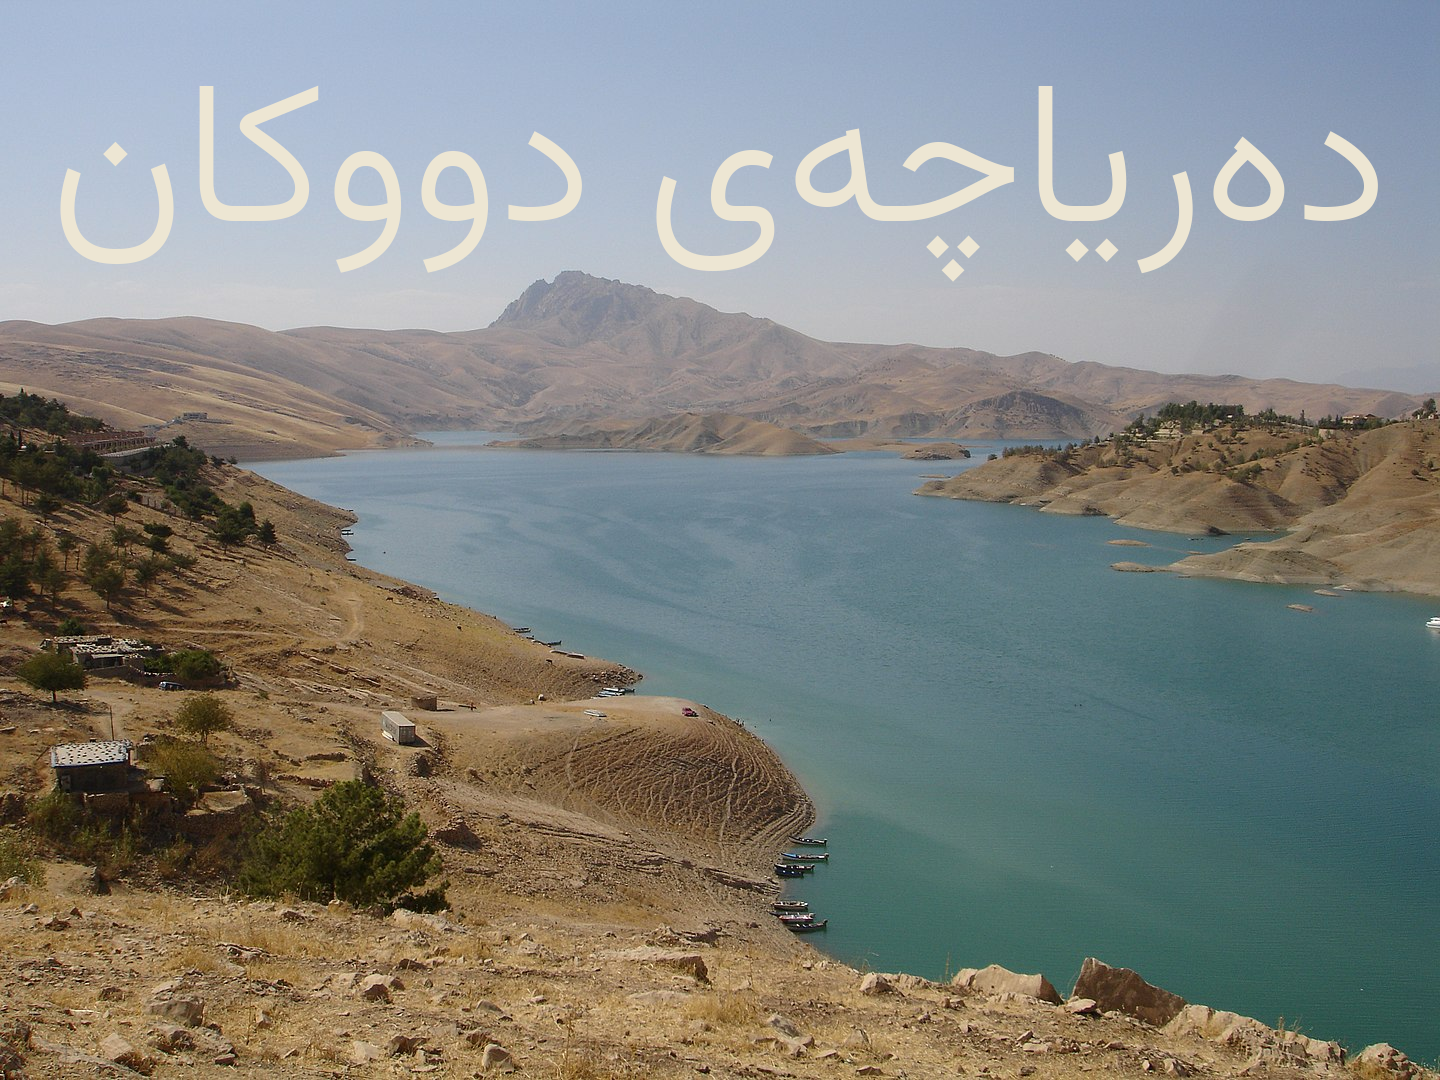

In [2]:
title1 = "دەریاچەی دووکان"
title1_font = ImageFont.truetype('~/Library/Fonts/Vazirmatn-Light.ttf', 200, layout_engine=ImageFont.Layout.RAQM)

with Image.open("img/1440px-Lake_Dukan_12.jpg") as img:
    image_editable = ImageDraw.Draw(img)
    image_editable.text((50,15), title1, (237, 230, 211), font=title1_font, direction="rtl", language="ckb-Arab")
    #img.save("result.jpg")
    #img.show()
    display(img)

In [18]:
title2 = 'တ︀ဲးၵ︀ံးတ︀ီ'
#title2_font = ImageFont.truetype('~/Library/Fonts/Padauk-Regular.ttf', 100, layout_engine=ENGINE)
title2_font = ImageFont.truetype('~/Library/Fonts/Padauk-Regular.ttf', 100, layout_engine=ImageFont.Layout.RAQM)

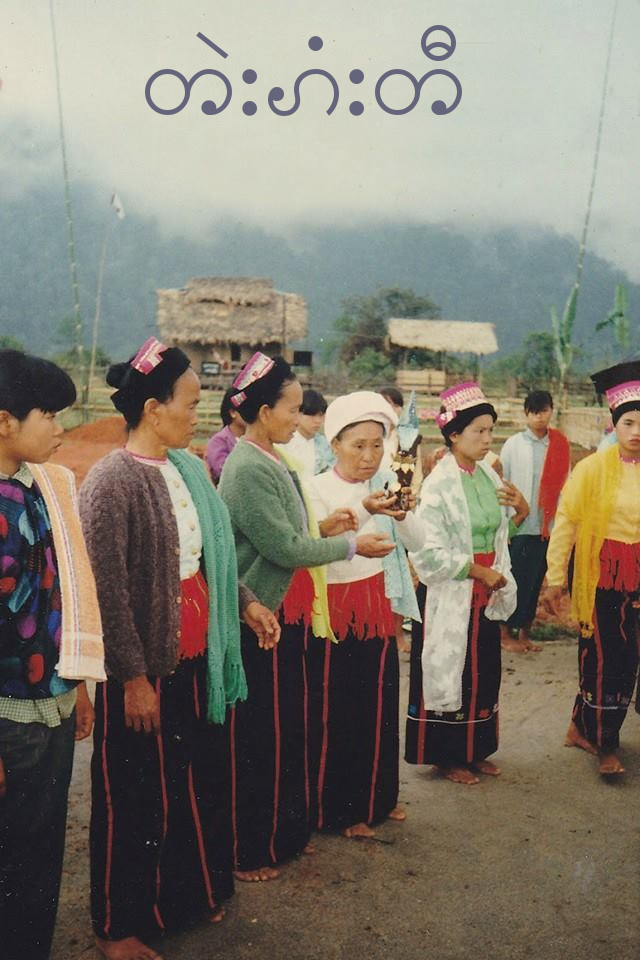

In [43]:
with Image.open("img/khamti.jpg") as img:
    image_editable = ImageDraw.Draw(img)
    image_editable.text((140,15), title2, (100,101, 122), font=title2_font, features=["ss01", "ss06"], language="kht")
    display(img)

In [44]:
title3 = 'တဲးၵံးတီ'
title3_font = ImageFont.truetype('~/Library/Fonts/Padauk-Regular.ttf', 100, layout_engine=ImageFont.Layout.RAQM)

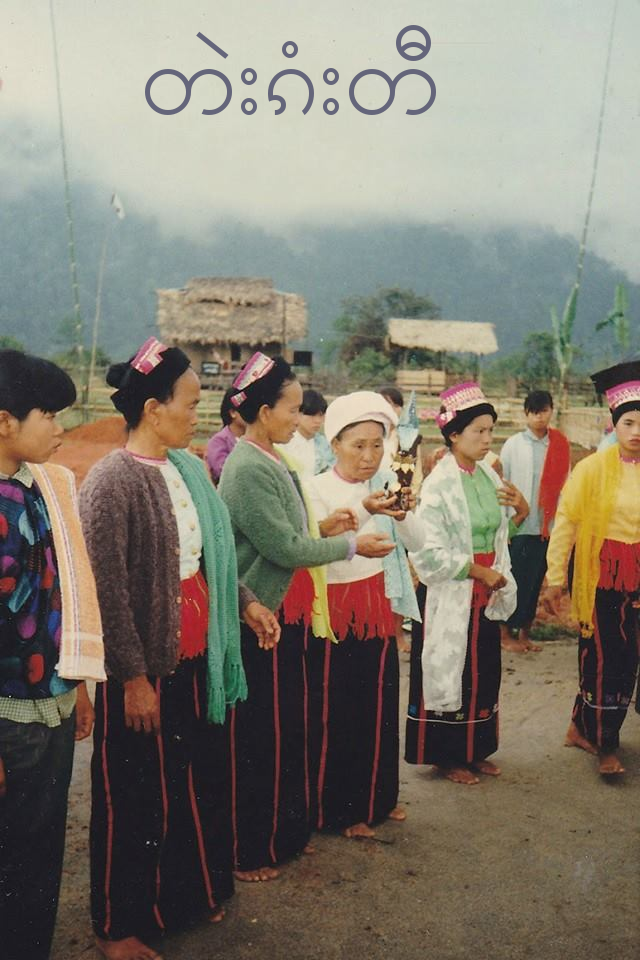

In [46]:
with Image.open("img/khamti.jpg") as img:
    image_editable = ImageDraw.Draw(img)
    image_editable.text((140,15), title3, (100,101, 122), font=title3_font)
    display(img)

# language="kht"
# features=["cv01", "cv06"]

In [50]:
title4 = 'တ︀ႝဢ︀ႝတ︀ွꩫ︀်'
title4_font = ImageFont.truetype('~/Library/Fonts/Padauk-Regular.ttf', 100, layout_engine=ImageFont.Layout.RAQM)

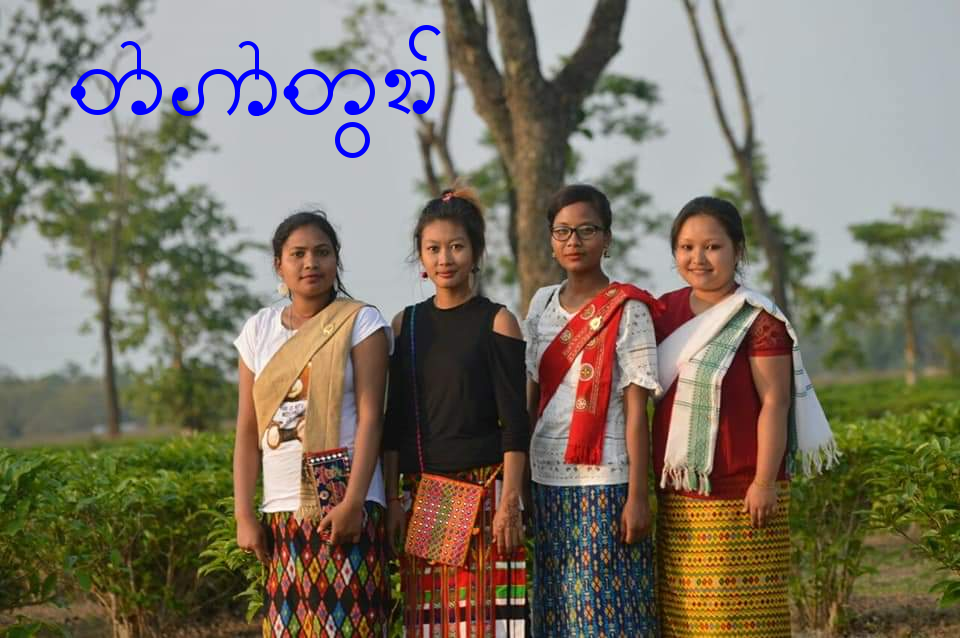

In [57]:
with Image.open("img/tai_aiton.jpg") as img:
    image_editable = ImageDraw.Draw(img)
    # image_editable.text((70,15), title4, (0, 0, 255), font=title4_font, features=["ss01", "ss06", "ss05"], language="aio")
    image_editable.text((70,15), title4, (0, 0, 255), font=title4_font, features=["cv01=1", "cv06=1", "cv05=1"], language="aio")
    display(img)

In [59]:
title5 = 'YOLŊU'
title5_font = ImageFont.truetype('~/Library/Fonts/GentiumPlus-Regular.ttf', 100, layout_engine=ImageFont.Layout.RAQM)

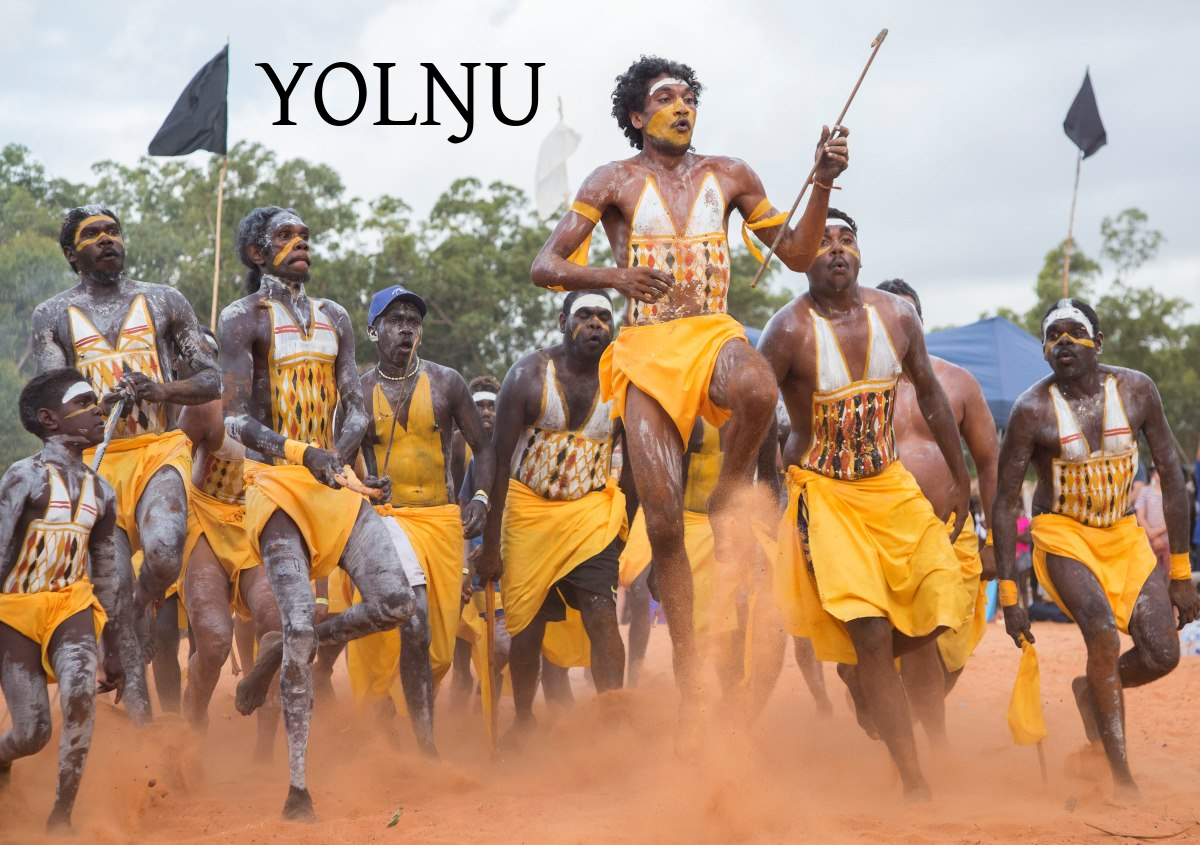

In [75]:
with Image.open("img/yolngu.jpg") as img:
    image_editable = ImageDraw.Draw(img)
    # image_editable.text((70,15), title4, (0, 0, 255), font=title4_font, features=["ss01", "ss06", "ss05"], language="aio")
    image_editable.text((255,15), title5, (0, 0, 0), font=title5_font, features=["cv43=2"])
    display(img)

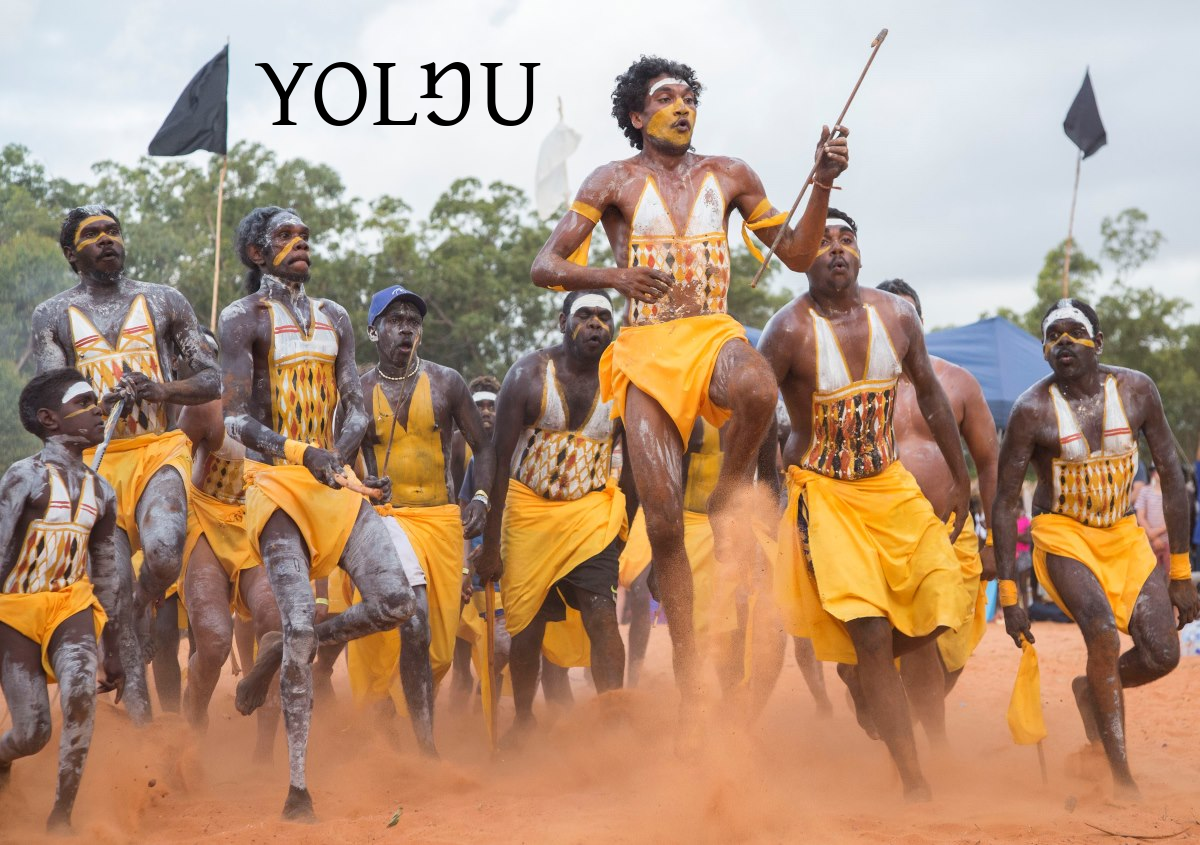

In [77]:
with Image.open("img/yolngu.jpg") as img:
    image_editable = ImageDraw.Draw(img)
    # image_editable.text((70,15), title4, (0, 0, 255), font=title4_font, features=["ss01", "ss06", "ss05"], language="aio")
    image_editable.text((255,15), title5, (0, 0, 0), font=title5_font, features=["cv43 3"])
    display(img)